In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [69]:
Mbh = 1e3
run_name = "Run_0"

## Semi-Major Axis Plot

In [70]:
t_i = time.perf_counter()

df1   = pd.read_csv(run_name+"_semi_major_axis"+".csv", delimiter =',',engine='c', header=0, usecols=[0])
df2 = pd.read_csv(run_name+"_semi_major_axis"+".csv", delimiter =',',engine='c', header=0, usecols=[1])
t = df1.to_numpy(dtype='float64').flatten()
sma = df2.to_numpy(dtype='float64').flatten()
df1 = None
df2 = None

t_f = time.perf_counter() - t_i

print("elapsed time ", round(t_f,6), "s")
print(len(t)/1000)


elapsed time  148.326044 s
195364.614


In [71]:
hz_to_invpc = 1.029e8
s_to_pc = 9.716e-9
m_to_pc = 3.241e-17
solar_mass_to_pc = 4.8e-14
g_cm3_to_invpc2 = 7.072e8
year_to_pc = 0.3064
yr_to_s = 31556952


def r_isco(Mbh):    
    """
    Radius of the Innermost Stable Circular Orbit (ISCO) of a Schwarzschild black hole with mass m
    """ 
    Mbh *= solar_mass_to_pc
    return 6.0*Mbh

In [72]:
print(t[0],t[-1])
print(sma[0]/r_isco(Mbh),sma[-1]/r_isco(Mbh))

7.057717614772666 7.7801476318503715
29.66732060978755 2.5498514584123244


elapsed time  2.427313 s


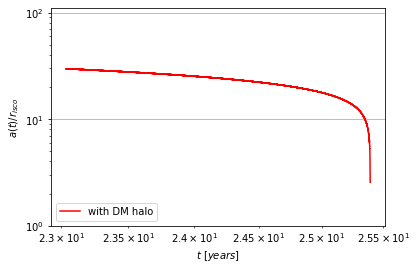

In [73]:
t_i = time.perf_counter()


def Semi_Major_Axis_Plot(t,sma):
    step_sma = 50  
    plot1 = plt.plot(t[0::step_sma]/year_to_pc, sma[0::step_sma]/r_isco(Mbh), label="with DM halo", c='r')
    plt.xlabel(r'$t$ $[years]$')
    plt.ylabel(r'$a(t)/r_{isco}$')
    plt.ylim(bottom=1, top=1.1e2)
    plt.xscale("log")
    plt.yscale("log")
    plt.legend(loc='lower left')
    plt.grid()
    plt.savefig(run_name+"_Semi_Major_Axis_Plot_py.png", dpi=300);
    return None

Semi_Major_Axis_Plot(t,sma)

t_f = time.perf_counter() - t_i

print("elapsed time ", round(t_f,6), "s")

In [74]:
t = None
sma = None

## Characteristic Strain Plot

In [75]:
if Mbh == 1e5:
    lisa_bandwidth = [1e-5*hz_to_invpc, 1e0*hz_to_invpc]
elif Mbh == 1e3:
    lisa_bandwidth = [1e-4*hz_to_invpc, 1e0*hz_to_invpc]

f_gw = np.geomspace(lisa_bandwidth[0], lisa_bandwidth[1], 100)

def NoiseSpectralDensity(f):
    P_oms = (1.5e-11 * m_to_pc)**2  * (1. + (2e-3 * hz_to_invpc/f)**4) / hz_to_invpc
    P_acc = (3e-15 * m_to_pc / s_to_pc**2)**2 * (1. + (0.4e-3 * hz_to_invpc/f)**2) * (1. + (f/8e-3/hz_to_invpc)**4) / hz_to_invpc
    f_s = 19.09e-3 * hz_to_invpc
    L = 2.5e9 * m_to_pc
    return 10./3./L**2  * (P_oms + 2.* (1. + np.cos(f/f_s)**2 ) * P_acc / (2.*np.pi*f)**4) * (1. + 6./10. * (f/f_s)**2)


NoiseStrain = np.sqrt(f_gw*NoiseSpectralDensity(f_gw))

In [76]:
t_i = time.perf_counter()

df1   = pd.read_csv(run_name+"_char_strain"+".csv", delimiter =',',engine='c', header=0, usecols=[0])
df2   = pd.read_csv(run_name+"_char_strain"+".csv", delimiter =',',engine='c', header=0, usecols=[1])
frequency = df1.to_numpy(dtype='float64').flatten()
h_char    = df2.to_numpy(dtype='float64').flatten()
df1 = None
df2 = None

t_f = time.perf_counter() - t_i

print("elapsed time ", round(t_f,6), "s")
print(len(frequency))

elapsed time  29.877557 s
36847069


elapsed time  3.195539 s


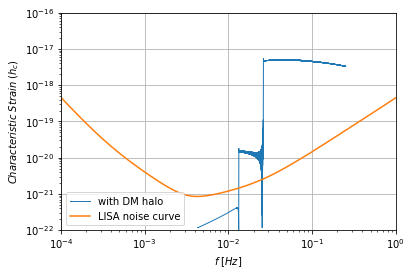

In [77]:
t_i = time.perf_counter()

def Char_Strain_plot(frequency, h_char, f_gw, lisa_bandwidth):
    f_start = int(1)
    f_end   = int(len(frequency)/2)
    step_hchar = 5
    
    plt.plot(frequency[f_start:f_end:step_hchar], h_char[f_start:f_end:step_hchar], label="with DM halo", lw=1)
    plt.plot(f_gw/hz_to_invpc, NoiseStrain, label="LISA noise curve")
    plt.xlabel(r'$f$ $[Hz]$')
    plt.ylabel(r'$Characteristic$ $Strain$ $(h_c)$')
    plt.ylim(bottom=1e-22, top=1e-16)
    plt.xlim(left=lisa_bandwidth[0]/hz_to_invpc, right=lisa_bandwidth[1]/hz_to_invpc)
    plt.xscale("log")
    plt.yscale("log")
    plt.legend(loc='lower left')
    plt.grid()
    plt.savefig(run_name+"_Char_Strain_Plot_py.png", dpi=300);
    return None


Char_Strain_plot(frequency, h_char, f_gw, lisa_bandwidth)


t_f = time.perf_counter() - t_i

print("elapsed time ", round(t_f,6), "s")

In [78]:
frequency = None
h_char = None